In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from GetR200 import getr200
%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [18]:
class cluster:
    def __init__(self,name,vr,sigma,ra,dec,r200):
        self.name=name
        self.vr=vr
        self.sigma=sigma
        self.ra=ra
        self.dec=dec
        self.r200=r200
    def readNSA(self):
        infile=self.name+'_NSA.fits'
        self.nsa=fits.getdata(infile)
        #infile.close()
    def readAGC(self):
        infile=self.name+'_AGC.fits'
        self.agc=fits.getdata(infile)
        #infile.close()
    def plotphasespace(self):
        deltaR = np.sqrt((self.ra - self.agc.RA)**2+(self.dec-self.agc.DEC)**2)
        deltaV = (self.agc.VOPT - self.vr)/self.sigma
        HIflag = self.agc.FLUX100 > 0
        plt.figure(figsize=(6,4))
        plt.plot(deltaR/self.r200,deltaV,'ko',label = 'AGC')
        plt.plot(deltaR[HIflag]/self.r200,deltaV[HIflag],'bs',markersize=10,mec='b',mfc='None',label='HI')
        deltaR = np.sqrt((self.ra - self.nsa.RA)**2+(self.dec-self.nsa.DEC)**2)
        deltaV = (self.nsa.ZDIST*3.e5 - self.vr)/self.sigma
        plt.plot(deltaR/self.r200,deltaV,'r.',label = 'NSA')
        plt.axis([0,3,-3,3])
        plt.title(self.name,fontsize=20)
        plt.xlabel('$\Delta r/R_{200} $',fontsize=20)
        plt.ylabel('$\Delta v/\sigma $',fontsize=20)
        plt.legend(loc='upper right')
        plt.savefig(self.name+'_phasespace.png')

In [19]:
##### BEGINNING OF MAIN PROGRAM  ######

# read in sample.dat
infile=open('sample.dat','r')
ra=[]
dec=[]
vr=[]
name=[]
for line in infile:
    #print line
    t=line.split()
    name.append(t[0])
    ra.append(float(t[1]))
    dec.append(float(t[2]))
    vr.append(float(t[3]))
infile.close()
# convert the lists into an array
ra=np.array(ra,'f')
dec=np.array(dec,'f')
vr=np.array(vr,'f')
name=np.array(name,'S10')

In [20]:
# read in velocity dispersions from biweight_center_scale.dat
infile= open('biweight_center_scale.dat','r')
name2=[]
centerv2=[]
sigma2=[]
for line in infile:
    #print line
    t=line.split()
    name2.append(t[0])
    centerv2.append(float(t[1]))
    sigma2.append(float(t[2]))
infile.close()
name2=np.array(name2,'S10')
centerv2=np.array(centerv2,'f')
sigma2=np.array(sigma2,'f')

In [21]:
centerv=np.zeros(len(name),'f')
sigma=np.zeros(len(name),'f')
for i in range(len(name)):
    centerv[i]=centerv2[name[i] == name2]
    sigma[i] = sigma2[name[i] == name2]

In [22]:
# calculate R200 for each cluster
cr200=getr200(centerv,sigma)

Found one you don't like:  NRGb004
Found one you don't like:  NRGs038
Found one you don't like:  NRGs090

Found one you don't like:  NRGb128






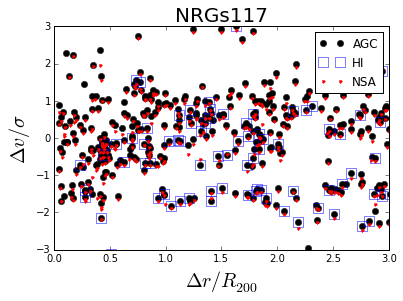

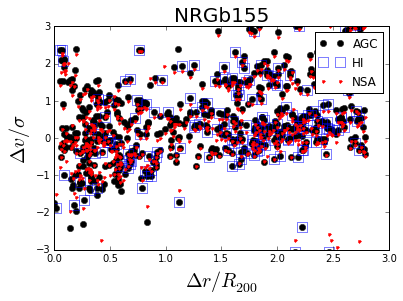

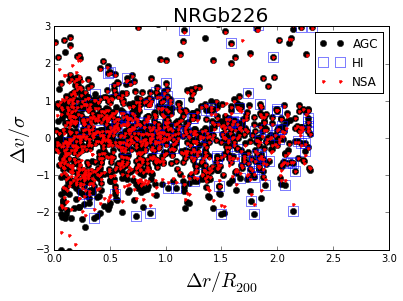

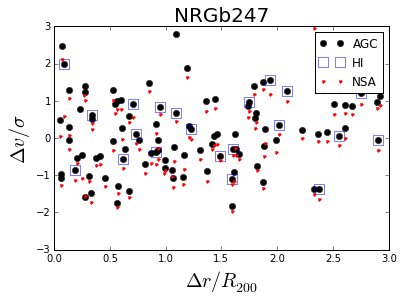

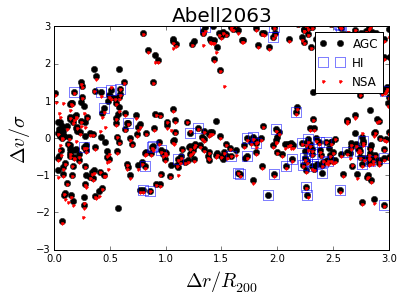

In [23]:
# loop over clusters and make phase-space diagram for each
clusterswedontlike=['NRGb004','NRGs038','NRGs090','NRGb128','NRGb128']
topfive=['NRGb155','NRGb226','Abell2063','NRGs117','NRGb247']

for i in range(len(name)):
    if name[i] in clusterswedontlike:
        print "Found one you don't like: ",name[i]
        continue
    if name[i] in topfive:
        print
        cl=cluster(name[i],centerv[i],sigma[i],ra[i],dec[i],cr200[i])
        cl.readNSA()
        cl.readAGC()
        cl.plotphasespace()

Need to do:
* Cut down sample
* Check center velocities
* Plot color/mag
* Only plot blue galaxies
* Dressler-Shectman Test - Evidence for substructure in rich clusters of galaxies

In [9]:
name

array(['NRGb004', 'NRGs027', 'NRGs038', 'NRGs076', 'NRGs090', 'NRGs110',
       'NRGs117', 'NRGb128', 'NRGb155', 'NRGb177', 'NRGb226', 'NRGb244',
       'NRGb247', 'NRGs317', 'Abell2063'], 
      dtype='|S10')